# Visualizing and Handling Outliers 

In this notebook we will be using the flight booking dataset obtained from “Ease My Trip” website, located on Kaggle website, and our main aim is to predict the flight price, but before getting to the modeling and predicting stage we must first clean our data and handle any outliers we find; in order to create a more accurate model later on.

And that's because; many machine learning models, like linear & logistic regression, are easily impacted by the outliers in the training data.

So, we will be using this dataset for educational purposes to learn about visualizing and handling outliers.

'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets.


The original link of the data set:
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

The various features of the cleaned dataset are explained below:
 1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
 
 2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
 
 3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
 
 4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
 
 5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
 
 6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
 
 7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
 
 8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
 
 9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
 
 10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
 
 11) Price: Target variable stores information of the ticket price.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("6. Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


We noticed that most of our features are of "string" data type, except 3 features which are numerical.

Our target (which is obviously "price") is also numerical of "integer" data type.


Let's drop the "Unnamed: 0" column or feature, as it's considered to be some kind of indixing which we will not be needing; because we already have the default indexing built in our Pandas DataFrame.

In [4]:
data = df.drop("Unnamed: 0", axis = 1)

In [5]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
# Before we begin to handle the outliers let's check our data for any missing values:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<Axes: >

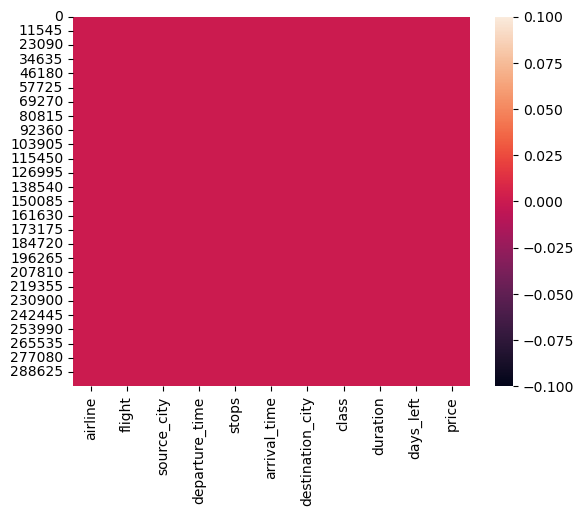

In [11]:
sns.heatmap(data.isnull())

In [7]:
data.describe().T # .T is a method for Pandas to do the transpose of the resulting matrix, for readability.

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


We can notice that both the "duration" feature and the target "price" has some outliers, but we need to visualize those outliers:

duration        Axes(0.125,0.11;0.227941x0.77)
days_left    Axes(0.398529,0.11;0.227941x0.77)
price        Axes(0.672059,0.11;0.227941x0.77)
dtype: object

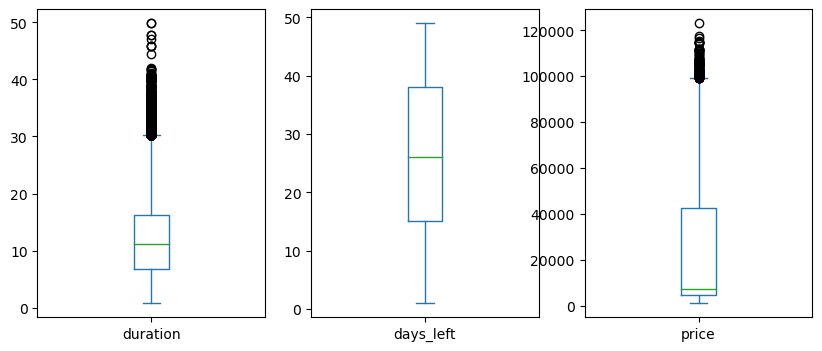

In [8]:
data.plot(kind = "box", figsize = (10,4), subplots = True)

Let's have more understanding of the data distribution:

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'days_left'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

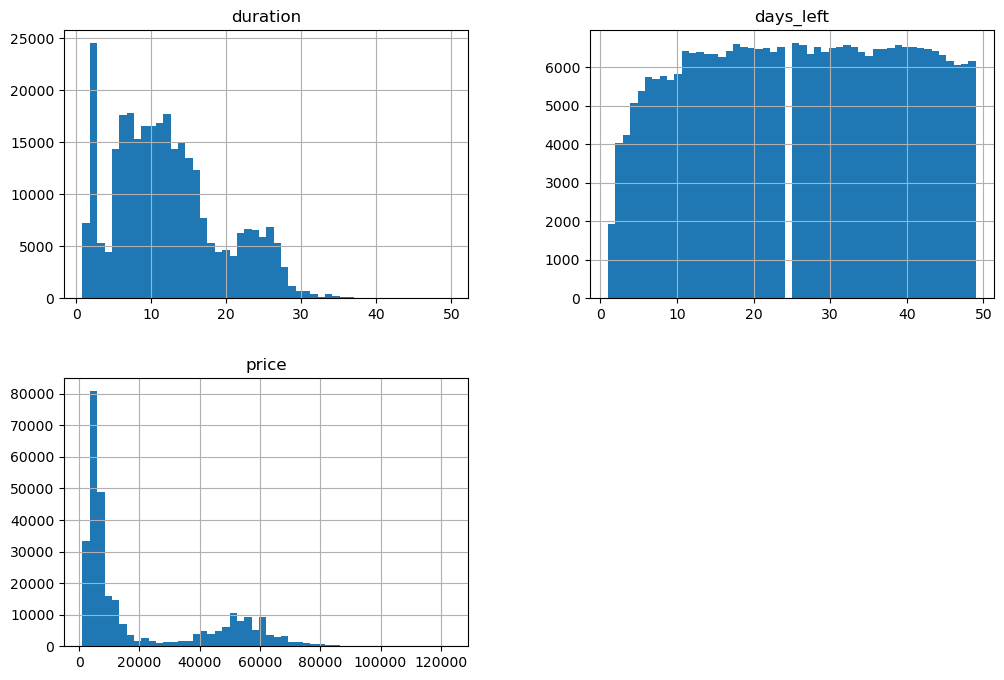

In [9]:
data.hist(bins = 50, figsize= (12,8))

#### Note that:
If we used a denisty plot (distplot or displot) we will not get a good visualization, due to the difference of the range for the "Price" target, let's see this in action:

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

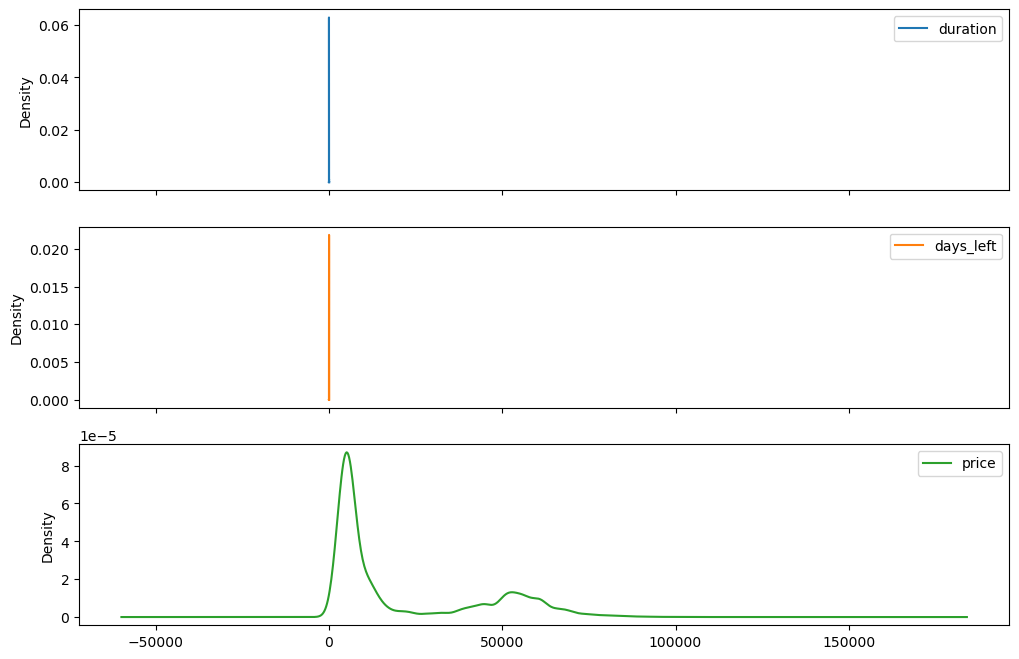

In [10]:
data.plot(kind = "density", subplots = True,  figsize = (12,8))

## Impact & Treatment of Outliers
The impact of outliers can be seen not only in predictive modeling but also in statistical tests where it reduces the power of tests. Most parametric statistics, like means, standard deviations, and correlations, and every statistic based on these, are highly sensitive to outliers.

## Common Techniques for Detecting Outliers

### Box-Plot
The quickest and easiest way to identify outliers is by visualizing them using plots. If our dataset is not huge (approx. up to 10k observations & 100 features), we would highly recommend to build scatter plots & box-plots of variables. If there aren’t outliers, we’ll definitely gain some other insights like correlations, variability, etc... 

However, this method is not recommended for high dimensional data where the power of visualization fails.

Box-plot like showed above.

The box plot uses inter-quartile range to detect outliers. Here, we first determine the quartiles Q1 and Q3.

Interquartile range is given by, IQR = Q3 - Q1

Upper limit = Q3+1.5*IQR

Lower limit = Q1-1.5*IQR

Anything below the lower limit and above the upper limit is considered an outlier


-------------------------

### Cook’s Distance
This is a multivariate approach for finding influential points. These points may or may not be outliers as explained above, but they have the power to influence the regression model.

This method is used only for linear regression and therefore has a limited application. Cook’s distance measures the effect of deleting a given observation. It’s represents the sum of all the changes in the regression model when observation “i” is removed from it.


The formula for Cook’s distance is:

Di = (ri2 / p*MSE) * (hii / (1-hii)2)


where:

ri is the ith residual
p is the number of coefficients in the regression model (number of predictors)
MSE is the mean squared error
hii is the ith leverage value


The larger the value for Cook’s distance, the more influential a given observation.

There are different views regarding the cut-off values to use for spotting highly influential points. A rule of thumb is that D(i) > 4/n (where n = total observations), is considered to be highly influential.


-----------------------------------------

### Z-Score
This method assumes that the variable has a Gaussian distribution. It represents the number of standard deviations an observation is away from the mean:
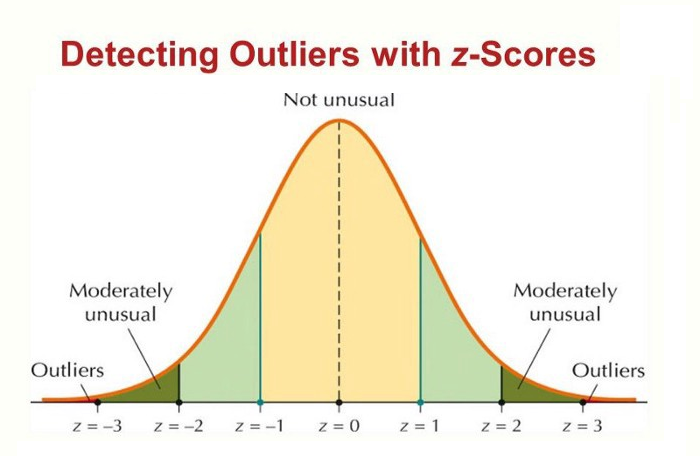

Usually z-score = 3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation 
method.


<br>
<br>
<br>
All the above methods are good for initial analysis of data, but they don’t have much value in multivariate settings or with high dimensional data. For such datasets, we have to use advanced methods like PCA, LOF (Local Outlier Factor) & HiCS: High Contrast Subspaces for Density-Based Outlier Ranking.



### Now let's handle some outliers! and let's work on the **"duration"** feature:

<Axes: xlabel='duration'>

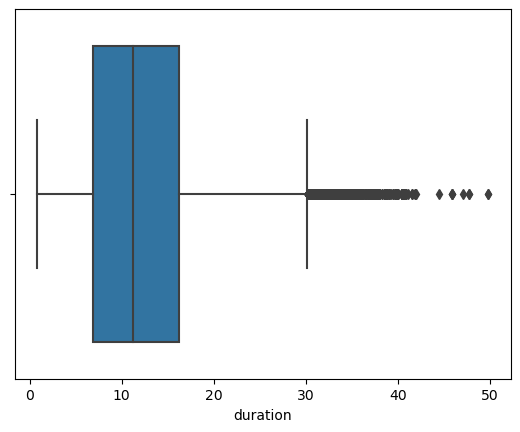

In [12]:
# Let's first visualize the outliers:
sns.boxplot(x=data['duration'])

From  the above graph or plot we can deduce that the outliers lie after (on the right side of) the value "30".

Now let's do some analysis on those outliers to see if we can dop them:

### Note That:
By dropping the outliers from the "duration" feature we also drop some critical data from all the other features.

In [13]:
# Let's get the count values of the data corresponding to those outliers in each feature:
print ("'duration' feature Outliers:", data[data['duration']>30].count(), sep = '\n')

'duration' feature Outliers:
airline             2226
flight              2226
source_city         2226
departure_time      2226
stops               2226
arrival_time        2226
destination_city    2226
class               2226
duration            2226
days_left           2226
price               2226
dtype: int64


We notice that their are only 2226 observations in each feature that corresponds the outliers observations of the "duration" feature, let's now get the percentage of those observations (rows):

In [14]:
# Let's first remember the dimensions of our data:
data.shape

(300153, 11)

In [15]:
# Get the outliers (with their corresponding data) percentage:
(2226/300153)*100

0.7416217728958232

We can see that it's a very very small percentage (≈0.74%), so we can drop them with a great confidence, but because we will be dropping some critical data from the "days_left" feature; we need to double check, in case we don't want to drop those critical data from the "days_left" feature or in case the percentage was great (>10%).

So, let's use some visualizations:

For visualizing outliers we use either boxplots (specially with discrete values) or scatter plots (specially for continous values) we have used the boxplot above, so now let's use the scatter plot:

Text(0, 0.5, 'price')

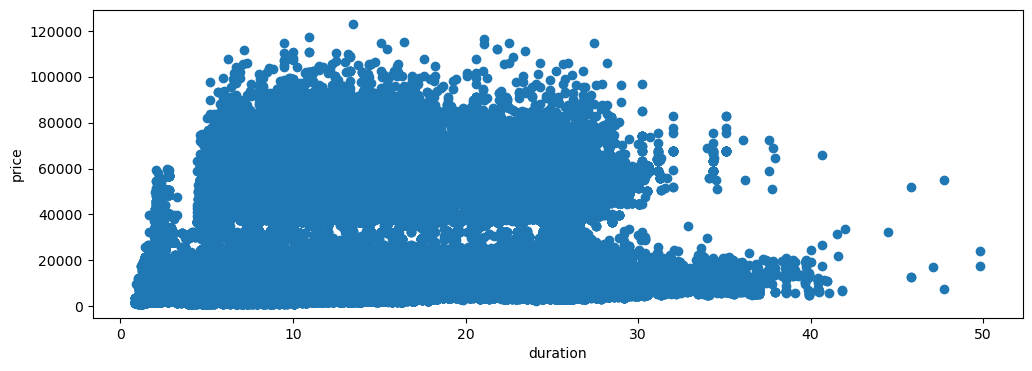

In [16]:
fig , ax = plt.subplots(figsize = (12,4))
ax.scatter(data['duration'] , data['price'])
ax.set_xlabel ("duration")
ax.set_ylabel ("price")

# Remember: we always graph the scatter plots with the target.

The above graph was plotted using the The explicit "Axes" interface of the matplotlib library or also known as the "object-oriented API", that we discussed in the "Data Preparation and Visualizaion" notebook 

Originally, it has the following syntax:
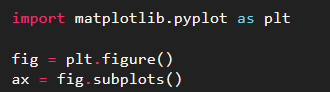


<br>
<br>

Remember also the other type of API (which is the famous one) known as The implicit "pyplot" interface:

Text(0, 0.5, 'price')

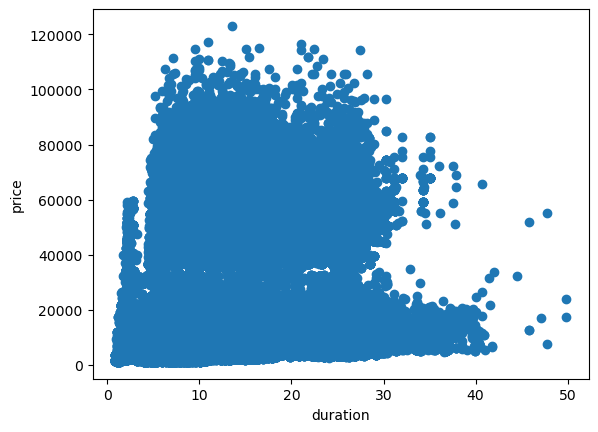

In [17]:
plt.scatter(data['duration'] , data['price'])
plt.xlabel ("duration")
plt.ylabel ("price")

From the above two graphs we can deduce that most of the outliers lie after the value "40", so let's check for the count now:

In [18]:
print ("'duration' feature most Outliers:", data[data['duration']>40].count(), sep = '\n')

'duration' feature most Outliers:
airline             48
flight              48
source_city         48
departure_time      48
stops               48
arrival_time        48
destination_city    48
class               48
duration            48
days_left           48
price               48
dtype: int64


Now we can drop those very very tiny outliers with their very very tiny corresponding data, and that if we don't want to lose much data by removing the 2226 observations.

Another way around we use, rather than directly dropping those observations, is to cast the the other observations that we want to keep into another DataFrame like follows:

In [19]:
df_new = data[data['duration']<=40]
df_new

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Now let's check our new DataFrame:

duration        Axes(0.125,0.11;0.227941x0.77)
days_left    Axes(0.398529,0.11;0.227941x0.77)
price        Axes(0.672059,0.11;0.227941x0.77)
dtype: object

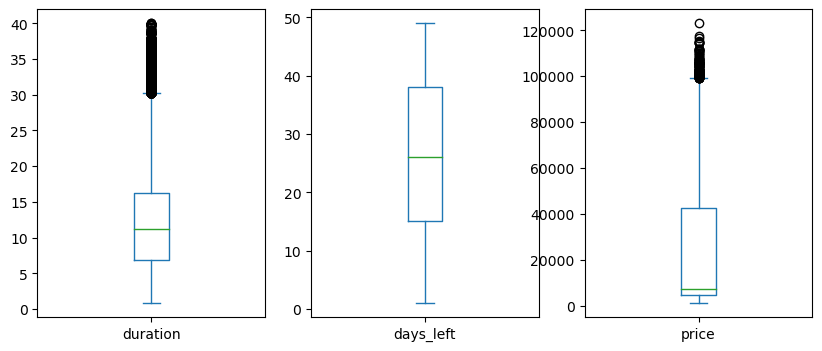

In [20]:
df_new.plot(kind = "box", figsize = (10,4), subplots = True)

Text(0, 0.5, 'price')

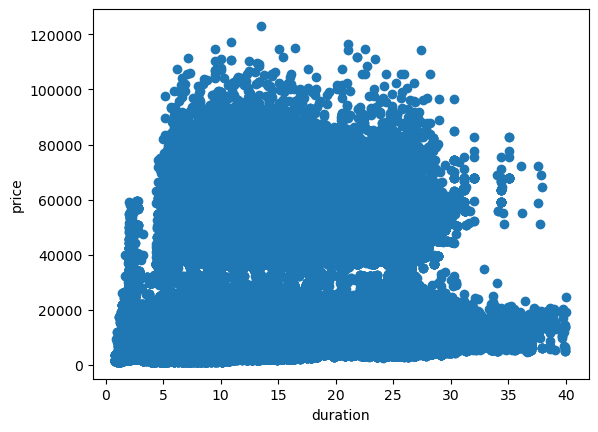

In [26]:
plt.scatter(df_new['duration'] , df_new['price'])
plt.xlabel ("duration")
plt.ylabel ("price")

If we removed all the outliers of the "duration" feature, we would get:

In [22]:
df_clean = data[data['duration']<=30]
df_clean 

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


duration        Axes(0.125,0.11;0.227941x0.77)
days_left    Axes(0.398529,0.11;0.227941x0.77)
price        Axes(0.672059,0.11;0.227941x0.77)
dtype: object

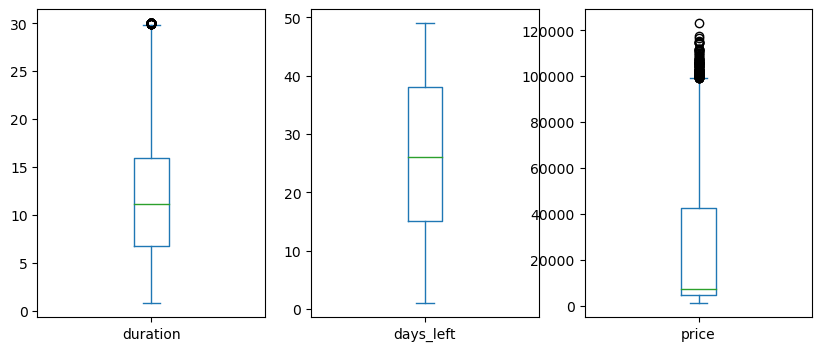

In [23]:
df_clean.plot(kind = "box", figsize = (10,4), subplots = True)

Text(0, 0.5, 'price')

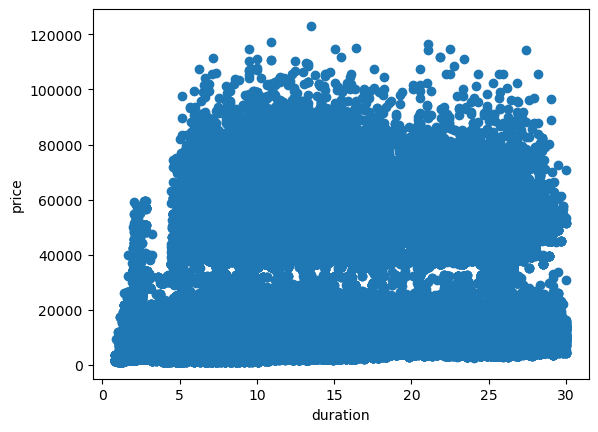

In [25]:
plt.scatter(df_clean['duration'] , df_clean['price'])
plt.xlabel ("duration")
plt.ylabel ("price")

If we decide to clear some of the target "price" outliers, we can repeat this technique with some trials and errors until we get the very minimum values to be dropped.

As discussed there are many algorithms and models to handle outliers like the "Robust Scaler" that was previously discussed and the famous "Robust Regression" model for linear regression, and many more.